# IE - Iteration 3 Open Data Analysis
## Identify hign and low application seasons

MP32 Bright

Author: Supawee Rattanajitdamrong

Environment: R

**How to use**: Perform analysis on the trends and identify hign and low application seasons. 
1. [Load data](#load)
2. [Compute MOM](#mom)
3. [Analyse MOM](#ana)

**Note: Before running this file, make sure you have run `'des_performance.py'` to update the 'DES_PERFORMANCE_NUMERICAL.csv'.**


### Summary

The analysis will be carried out by looking at the Month-over-month (MOM) growth rate. 


MOM = (present month - previous month) / previous month


Additionally, since the data of 2011 and 2020 are incomplete, they are disregarded during this step. Consequently, the MOM is averaged over the month. The month with the highest averaged MOM is to be the high season, similarly the month with the lowest averaged MOM is to be the low season. 


## Import library

In [1]:
library(ggplot2)
library(gridExtra) 

## Load data <a class="anchor" id="load"></a>

In [2]:
data <- read.csv('../Dataset/DES_PERFORMANCE_NUMERICAL.csv')

data <- data[data$Year != 2011 & data$Year != 2020 ,]
data['Month'] = match(data[,'Month'],month.name)

In [3]:
head(data)

,Year,Month,Referred,Suspended,Commenced,Total,Commenced_Employment,Commenced_Placement,Commenced_Ongoing,MOM,Direction,Referred.,Suspended.,Commenced.,Commenced_Employment.,Commenced_Placement.,Commenced_Ongoing.,Year.Month
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,2012,1,9354,21344,117426,148124,73748,31253,11915,0.00,,6,14,79,63,27,10,2012-01-01
8,2012,2,9598,22278,117563,149439,72438,32682,11915,0.89,Increased,6,15,79,62,28,10,2012-02-01
9,2012,3,9699,22464,116640,148803,71053,32317,13270,-0.43,Decreased,7,15,78,61,28,11,2012-03-01
10,2012,4,9409,23085,116275,148769,71882,32317,13270,-0.02,Decreased,6,16,78,62,28,11,2012-04-01
11,2012,5,9313,24493,115666,149472,72149,32317,13270,0.47,Increased,6,16,77,62,28,11,2012-05-01
12,2012,6,8748,23662,115917,148327,73432,32317,13270,-0.77,Decreased,6,16,78,63,28,11,2012-06-01


# Compute MOM rate<a class="anchor" id="mom"></a>

MOM = (present month - previous month) / previous month

In [4]:
# for every year between 2012 to 2019 
for (i in seq(2012,2019)) {
    
    for (j in seq(1,12)){
        
        if (i == 2012 & j == 1) {
            
            data[data$Year == i & data$Month == j, 'MOM'] = 0
        }
        else if (j != 1) {
            
            present = data[data$Year == i & data$Month == j, 'Total'] 
            past = data[data$Year == i & data$Month == j-1, 'Total'] 
                        
            data[data$Year == i & data$Month == j, 'MOM']  = round((100*(present - past))/past,2)
        }      
        else if (j == 1) {
            
            present = data[data$Year == i & data$Month == j, 'Total'] 
            past = data[data$Year == i-1 & data$Month == 12, 'Total'] 
            
            data[data$Year == i & data$Month == j, 'MOM']  = round((100*(present - past))/ past,2)            
        }
        
        else if (i > 2012) {
            
            present = data[data$Year == i & data$Month == j, 'Total'] 
            prev_year = data[data$Year == i-1 & data$Month == j, 'Total'] 
            
            }
    }
}

# Analyse MOM <a class="anchor" id="ana"></a>

After the MOM is computed, consequently the MOM is averaged over the month. The month with the highest averaged MOM is to be the high season, similarly the month with the lowest averaged MOM is to be the low season. 


In [5]:
mom_by_month = aggregate(data$MOM, by = list(data$Month), FUN = mean)

In [6]:
names(mom_by_month) = c('Month','AVG.MOM')

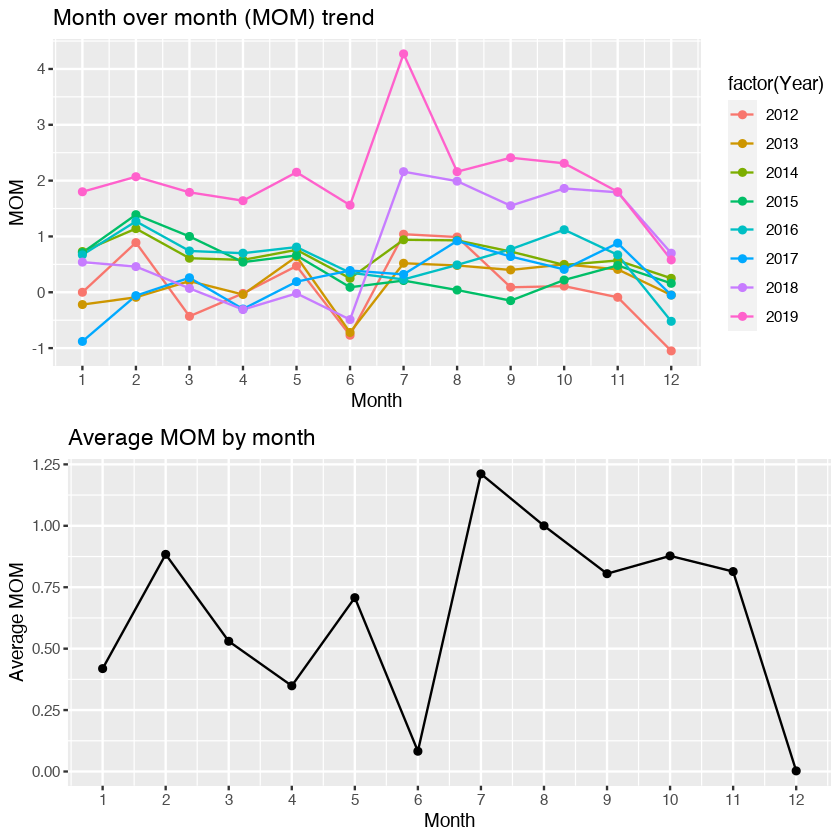

In [7]:

mom <- ggplot(data, aes(Month, MOM, color=factor(Year))) + geom_line() + geom_point() +
ggtitle('Month over month (MOM) trend') +scale_x_continuous(breaks = seq(1,12,1))

mom_mean <- ggplot(mom_by_month, aes(Month, AVG.MOM )) + geom_line() + geom_point() +
scale_x_continuous(breaks = seq(1,12,1)) + ggtitle('Average MOM by month') + ylab('Average MOM') + xlab('Month')


grid.arrange(mom, mom_mean ,ncol = 1)

## Result

In [8]:
# identify major changes 
mean = sum(mom_by_month['AVG.MOM'])/12

In [9]:
HIGH = mom_by_month[(mom_by_month['AVG.MOM'] - mean) > 0.5,'Month']
cat('The HIGH application period is during', month.name[HIGH])
cat('\n')

LOW = mom_by_month[(mom_by_month['AVG.MOM'] - mean) < - 0.5,'Month']
cat('The LOW application period is during', month.name[LOW])

The HIGH application period is during July
The LOW application period is during June December

The result will need to be update in 'desperformance.html' under 'Caseload Trend' sections for both normal and color blind versions. 